# TensorFlow

This notebook provides a comprehensive guide on implementing neural networks using TensorFlow libraries.

By: Bryce Li, NUS

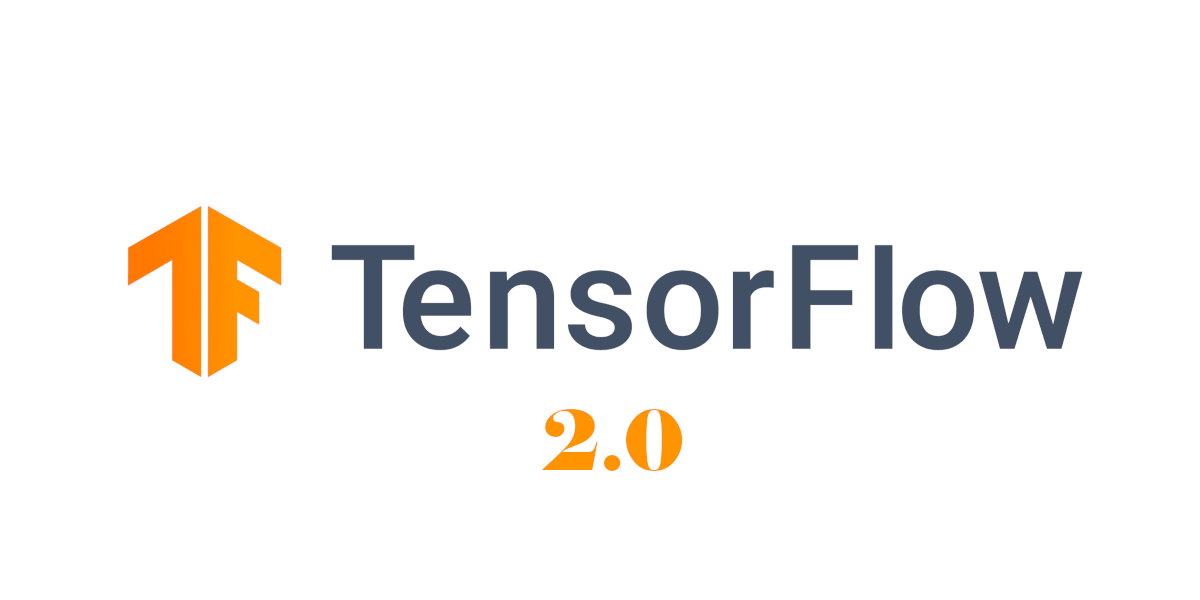

## Introducation

Tensorflow is an open-source machine learning library developed by Google Brain Team. It was initially released in 2015 and has since become one of the most popular machine learning libraries. Tensorflow is used for a wide range of applications, including computer vision, natural language processing, and speech recognition.



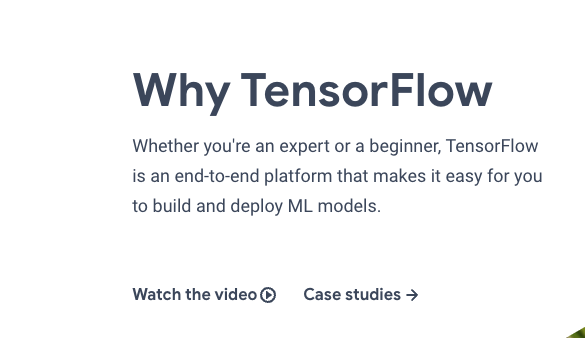

## Install 

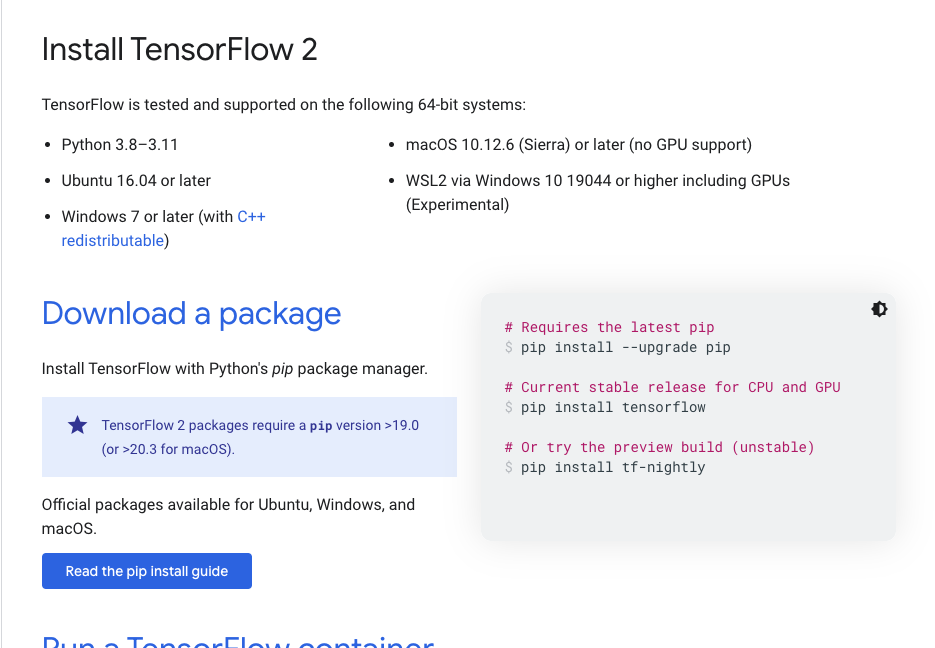

## Step-by-Step Guide to Installing Tensorflow with Anaconda

### Step 1: Install Anaconda

### Step 2: Create a New Environment

Once you have installed Anaconda, the next step is to create a new environment for Tensorflow. You can use the following command to create a new environment called tensorflow:



conda create -n tensorflow python=3.8

This command will create a new environment called tensorflow with Python 3.8 installed.

### Step 3: Activate the Environment

After creating the environment, you need to activate it using the following command:

conda activate tensorflow


### Step 4: GPU setup (You can skip this step if you only run Tensorflow on CPU)

### Step 5: Install Tensorflow


Before installing Tensorflow, make sure to upgrade your pip to the lastest version as Tensorflow requires a recent version of pip.

pip install --upgrade pip

Now that you have created and activated the environment, you can install Tensorflow using the following command:

pip install tensorflow

This command will download and install the latest version of Tensorflow in your environment.



### Step 6: Verify the Installation
To verify that Tensorflow is installed correctly, you can open a Python shell and run the following commands

#### Verify the CPU setup:

python -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))"


#### Verify the GPU setup:

python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

## Import TensorFlow

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
tf.__version__

'2.13.0'

## Load data


In [24]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

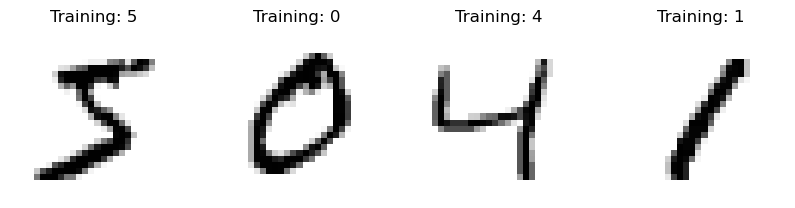

In [25]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Construct Model

### Building tf.keras.Sequential models by stacking layers.

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])

For each sample, the model returns a vector of probalities.

In [27]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.11046501, 0.04218425, 0.12287201, 0.05028928, 0.07517275,
        0.1158703 , 0.10705772, 0.1406171 , 0.14806356, 0.08740808]],
      dtype=float32)

**Note:** 
It is possible to bake tf.nn.softmax into the activation function of the last layer of the network. While this can make the model output easier to interpret, it is not recommended because it is not possible to provide an accurate and numerically stable loss calculation for all models when using softmax output.


Define a loss function for training using *losses.SparseCategoricalCrossentropy*, which takes a *logits vector* and True index and returns a scalar loss for each sample.

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

This loss is equal to the negative log probability of the true class: if the model determines that the class is correct, the loss is zero.
This untrained model gives a probability close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3

In [29]:
loss_fn(y_train[:1], predictions).numpy()

2.155284

efore you start training, use Keras Model.compile to configure and compile the model. Set the optimizer class to adam, set loss to the loss_fn function you defined earlier, and specify the metrics to evaluate for the model by setting the metrics parameter to accuracy.

In [30]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate the model

In [31]:
from sklearn import  metrics

In [43]:
epochs=50

In [44]:
history=model.fit(x_train, y_train, validation_split=0.2,epochs=epochs)

Epoch 1/50
1500/1500 [==============================] - 1s 599us/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0401 - val_accuracy: 0.9879
Epoch 2/50
1500/1500 [==============================] - 1s 532us/step - loss: 0.0269 - accuracy: 0.9909 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 3/50
1500/1500 [==============================] - 1s 550us/step - loss: 0.0266 - accuracy: 0.9909 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 4/50
1500/1500 [==============================] - 1s 559us/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0373 - val_accuracy: 0.9896
Epoch 5/50
1500/1500 [==============================] - 1s 607us/step - loss: 0.0249 - accuracy: 0.9911 - val_loss: 0.0423 - val_accuracy: 0.9872
Epoch 6/50
1500/1500 [==============================] - 1s 581us/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 0.0382 - val_accuracy: 0.9885
Epoch 7/50
1500/1500 [==============================] - 1s 561us/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0474 -

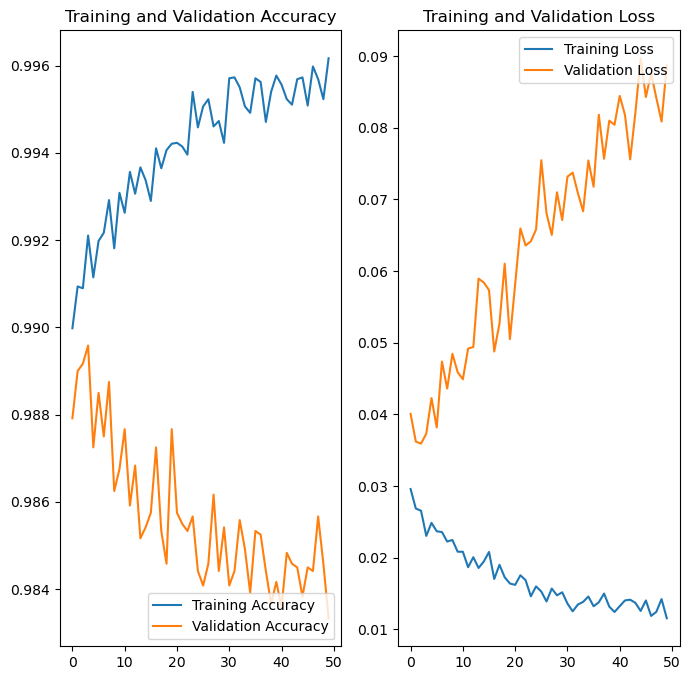

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.2918992e-07, 4.0942125e-09, 2.3888610e-06, 1.3607621e-04,
        1.7563460e-10, 6.6293200e-07, 4.2949631e-13, 9.9984229e-01,
        5.7020816e-07, 1.7627119e-05],
       [7.5946424e-08, 4.2258685e-05, 9.9995077e-01, 5.4346601e-06,
        4.0680676e-15, 1.4419928e-06, 3.4607382e-08, 3.4746850e-13,
        2.7486619e-08, 3.5932374e-14],
       [4.6943831e-07, 9.9732357e-01, 9.4029790e-04, 1.5798147e-04,
        1.2766494e-05, 9.2986529e-06, 2.4687242e-06, 1.3900235e-03,
        1.6186104e-04, 1.3238156e-06],
       [9.9998999e-01, 2.9403834e-12, 3.0121951e-06, 1.3371085e-08,
        2.5756893e-07, 1.4670246e-06, 2.3847704e-06, 1.5801381e-06,
        1.1017000e-08, 1.2586754e-06],
       [2.5979389e-06, 2.5689246e-09, 1.3200528e-06, 2.0750526e-09,
        9.9686831e-01, 3.6537247e-07, 4.1982344e-07, 1.8218014e-04,
        1.8390944e-07, 2.9445458e-03]], dtype=float32)>

In [34]:
predicted=model.predict(x_test)

313/313 [==============================] - 0s 263us/step


In [36]:
predicted

array([[2.2918992e-07, 4.0942125e-09, 2.3888610e-06, ..., 9.9984229e-01,
        5.7020765e-07, 1.7627119e-05],
       [7.5946424e-08, 4.2258685e-05, 9.9995077e-01, ..., 3.4746850e-13,
        2.7486566e-08, 3.5932374e-14],
       [4.6943831e-07, 9.9732357e-01, 9.4029790e-04, ..., 1.3900235e-03,
        1.6186104e-04, 1.3238168e-06],
       ...,
       [6.4908023e-11, 1.0564544e-11, 3.5362333e-10, ..., 2.2653499e-05,
        2.1478595e-06, 2.9755052e-04],
       [3.4535199e-07, 8.1224766e-10, 1.6257075e-10, ..., 9.3984120e-08,
        9.5120549e-06, 1.4772288e-09],
       [8.9351682e-09, 1.5469585e-13, 2.7174869e-07, ..., 2.3672855e-13,
        2.2020576e-10, 6.6792485e-14]], dtype=float32)

In [46]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 322us/step - loss: 0.1273 - accuracy: 0.9797


In [47]:
test_loss, test_acc

(0.127275288105011, 0.9797000288963318)

In [50]:
predicted_labels = tf.argmax(predicted, axis=1)

In [51]:
predicted_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [52]:
print(
    f"Classification report for classifier NN:\n"
    f"{metrics.classification_report(y_test, predicted_labels)}\n"
)

Classification report for classifier NN:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




Confusion matrix:
[[ 972    0    2    0    2    0    1    1    2    0]
 [   0 1127    3    1    0    0    1    0    3    0]
 [   4    1 1010    1    2    1    1    8    4    0]
 [   1    0    6  979    0    8    0    4    5    7]
 [   1    0    2    0  965    0    4    1    2    7]
 [   2    1    0    6    1  873    5    0    2    2]
 [  10    3    0    1    3    5  931    1    4    0]
 [   1    5   12    0    0    0    0 1002    2    6]
 [   6    0    3    3    4    4    2    3  945    4]
 [   3    4    0    3   10    2    0    3    1  983]]


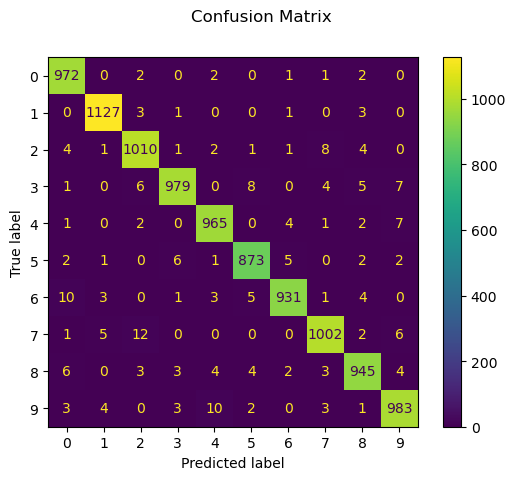

In [53]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Practice

Implement your own neural newtork to classify Iris data set.[Refer to Seaborn section to load data]

* Try diffrent metrics

* Try different neural network structure